# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
%matplotlib inline

# Checkout data

In [2]:
df = pd.read_csv('Multiple_Linear_Regression_Advertising_data.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [4]:
df.keys()

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

# Data visulization

In [5]:
sns.set_palette('GnBu_d')
sns.set_style('whitegrid')

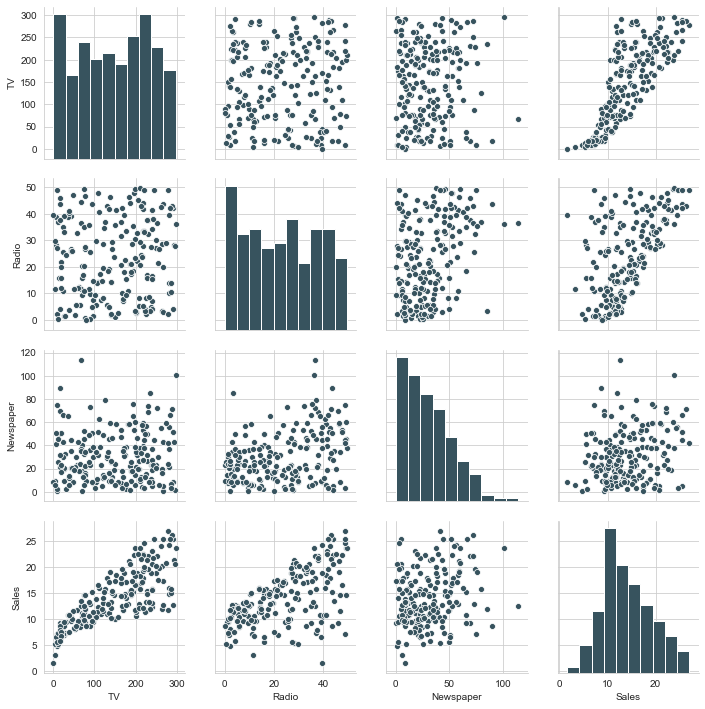

In [6]:
sns.pairplot(df)

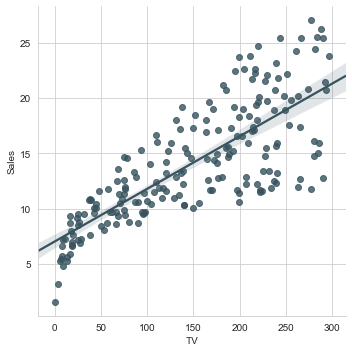

In [7]:
sns.lmplot('TV','Sales',df)

# Creating X and Y arrays

In [8]:
X = df.iloc[:,:3]
y = df.iloc[:,-1]

# Creating Train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)

# Creating and training model

In [10]:
lm = LinearRegression()

In [11]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Model evaluation

In [12]:
print(lm.intercept_)

3.1072135963445486


In [13]:
lm.coef_

array([0.0442173 , 0.18865409, 0.00181911])

In [14]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.044217
Radio,0.188654
Newspaper,0.001819


# Predictions from our model

In [15]:
pred = lm.predict(X_test)

Text(0, 0.5, 'Prediction')

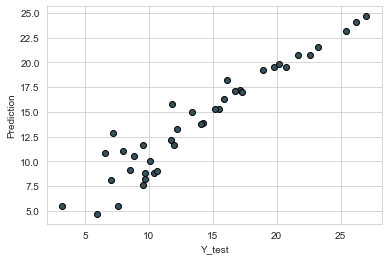

In [18]:
plt.scatter(y_test,pred,edgecolors='k')
plt.xlabel('Y_test')
plt.ylabel('Prediction')

In [20]:
r2_score(y_test,pred)

0.9032049399335232

# Regression evaluation metrics

In [21]:
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE: 1.4155875681427743
MSE: 3.5030713008418344
RMSE: 1.8716493530685268
